## Image classification model on 4 different categories of collection of images

### Images are scraped from Google

In [27]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [28]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [29]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

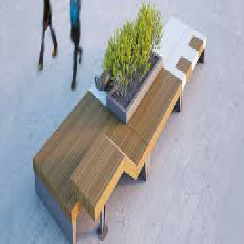

In [30]:
chair_image_id = os.listdir('/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images/street_chairs')[0]
chair_path = os.path.join('/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images/street_chairs', chair_image_id)
chair_image = load_image(chair_path)

tf.keras.preprocessing.image.load_img(chair_path, target_size=(244,244))

In [31]:
print(f'shape: {chair_image.shape}')
print(f'type: {type(chair_image)}')

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>


In [32]:
model.predict(chair_image)

1/1 [==============================] - 0s 398ms/step


array([[5.04264733e-07, 4.33120562e-07, 2.26089668e-07, 4.04753031e-08,
        3.35746063e-06, 1.00834093e-07, 5.16050491e-08, 2.10193684e-06,
        4.68293365e-06, 1.41656710e-06, 9.65995969e-06, 8.08154709e-07,
        5.82485973e-06, 4.77895401e-06, 4.85232595e-05, 5.56418718e-06,
        3.95057350e-06, 7.32104172e-06, 3.57610674e-07, 1.50968322e-06,
        6.38022073e-07, 8.17002785e-07, 3.65980839e-07, 3.13038072e-06,
        4.10576817e-08, 2.71393247e-07, 1.43436182e-06, 1.76667766e-06,
        2.02862694e-07, 6.38397282e-08, 1.35392328e-08, 1.09580967e-07,
        7.76777540e-07, 1.07154264e-07, 1.44108100e-07, 1.21952027e-07,
        1.07029825e-06, 2.19529554e-07, 1.32383866e-05, 4.48505773e-07,
        1.09785731e-06, 1.73459500e-06, 1.08830125e-06, 1.75891580e-06,
        2.26349627e-07, 4.54835487e-07, 6.75839601e-07, 3.69976715e-06,
        1.75734215e-07, 4.93188379e-09, 1.11665130e-07, 1.32568445e-07,
        3.18516118e-06, 1.34974243e-06, 5.03775425e-07, 2.730573

In [33]:
model = tf.keras.applications.mobilenet.MobileNet(
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [34]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [35]:
model.predict(chair_image).shape

1/1 [==============================] - 0s 389ms/step


(1, 1024)

In [36]:
x = Dropout(rate=0.4)(model.output)
x = Dense(4)(x)
x = Softmax()(x)
model = Model(model.inputs, x)

In [37]:
for layer in model.layers[:-3]:
  layer.trainable = False

In [38]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [39]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 336 images belonging to 4 classes.
Found 35 images belonging to 4 classes.


In [40]:
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=10,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/10
10/10 [==============================] - 17s 2s/step - loss: 2.1140 - val_loss: 1.3051
Epoch 2/10
10/10 [==============================] - 15s 1s/step - loss: 1.2370 - val_loss: 0.6273
Epoch 3/10
10/10 [==============================] - 15s 1s/step - loss: 0.9716 - val_loss: 0.6094
Epoch 4/10
10/10 [==============================] - 15s 1s/step - loss: 0.6689 - val_loss: 0.4907
Epoch 5/10
10/10 [==============================] - 16s 2s/step - loss: 0.6653 - val_loss: 0.3373
Epoch 6/10
10/10 [==============================] - 15s 1s/step - loss: 0.5291 - val_loss: 0.3220
Epoch 7/10
10/10 [==============================] - 15s 1s/step - loss: 0.4797 - val_loss: 0.3317
Epoch 8/10
10/10 [==============================] - 15s 1s/step - loss: 0.3973 - val_loss: 0.4074
Epoch 9/10
10/10 [==============================] - 15s 1s/step - loss: 0.3889 - val_loss: 0.2957
Epoch 10/10
10/10 [==============================] - 18s 2s/step - loss: 0.3536 - val_loss: 0.2344


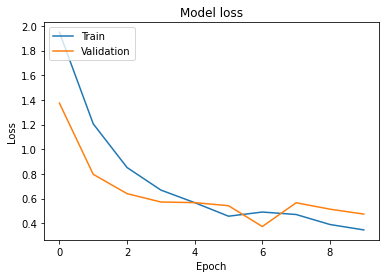

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
random_chair = random.choice(os.listdir('/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images/street_chairs'))
chair_path = os.path.join('/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images/street_chairs',random_chair)
chair = load_image(chair_path)
random_istanbul = random.choice(os.listdir('/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images/street_chairs_in_istanbul'))
istanbul_path = os.path.join('/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images/street_chairs_in_istanbul',random_istanbul)
istanbul = load_image(istanbul_path)
random_car = random.choice(os.listdir('/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images/drive_in_theatre'))
car_path = os.path.join('/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images/drive_in_theatre',random_car)
car = load_image(car_path)
random_stairs = random.choice(os.listdir('/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images/street_stairs'))
stairs_path = os.path.join('/Users/mansikothari/Documents/UD_MARCH/Skills_Class/Image_Scraping/images/street_stairs',random_stairs)
stairs = load_image(stairs_path)

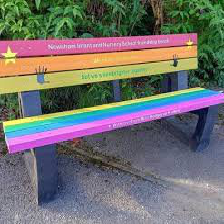

In [17]:
tf.keras.preprocessing.image.load_img(chair_path, target_size=(224,224))

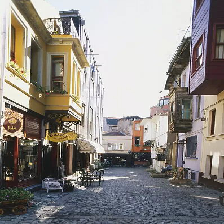

In [18]:
tf.keras.preprocessing.image.load_img(istanbul_path, target_size=(224,224))

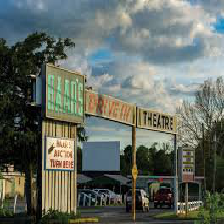

In [26]:
tf.keras.preprocessing.image.load_img(car_path, target_size=(224,224))

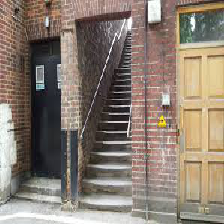

In [20]:
tf.keras.preprocessing.image.load_img(stairs_path, target_size=(224,224))

In [21]:
print(f'''chair:{np.round(model.predict(chair),2)}''')

1/1 [==============================] - 0s 384ms/step
chair:[[0.01 0.93 0.   0.06]]


In [22]:
print(f'''istanbul:{np.round(model.predict(istanbul),2)}''')

1/1 [==============================] - 0s 46ms/step
istanbul:[[0.06 0.02 0.84 0.07]]


In [23]:
print(f'''car:{np.round(model.predict(car),2)}''')

1/1 [==============================] - 0s 50ms/step
car:[[0.92 0.03 0.02 0.04]]


In [25]:
print(f'''stairs:{np.round(model.predict(stairs),2)}''')

1/1 [==============================] - 0s 50ms/step
stairs:[[0.   0.06 0.02 0.91]]
